In [1]:
import define_transformations_afolu as dta
import define_transformations_circular_economy as dtc
import define_transformations_energy as dte
import define_transformations_ippu as dti
import define_transformations_integrated as dtr

import os, os.path
import numpy as np
import pandas as pd
#from model_attributes import *
import model_attributes as ma
import model_afolu as mafl
import model_ippu as mi
import model_circular_economy as mc
import model_electricity as ml
import model_energy as me
import model_socioeconomic as se
import setup_analysis as sa
import sisepuede_data_api as api
import sisepuede_models as sm
import support_classes as sc
import support_functions as sf
import importlib
import time
import warnings
import matplotlib.pyplot as plt
from typing import Union
import inspect
import ingestion as ing
import logging
from sisepuede_file_structure import *
import transformations_base_afolu as tba
import transformations_base_circular_economy as tbc
import transformations_base_energy as tbe
import transformations_base_general as tbg
import transformations_base_ippu as tbi


importlib.reload(ma)
importlib.reload(sa)
importlib.reload(sf)
importlib.reload(mafl)
importlib.reload(mc)
importlib.reload(mi)
importlib.reload(me)
importlib.reload(se)
importlib.reload(tbc)
importlib.reload(tbe)


import sisepuede as ssp


def _setup_logger(namespace: str, fn_out: Union[str, None] = None) -> None:
    global logger
    
    format_str = "%(asctime)s - %(levelname)s - %(message)s"
    # configure
    if fn_out is not None:
        logging.basicConfig(
            filename = fn_out,
            filemode = "w",
            format = format_str,
            level = logging.DEBUG
        )
    else:
        logging.basicConfig(
            format = format_str,
            level = logging.DEBUG
        )
        
    logger = logging.getLogger(namespace)
    # create console handler and set level to debug
    ch = logging.StreamHandler()
    ch.setLevel(logging.DEBUG)
    # create formatter
    formatter = logging.Formatter(format_str)
    # add formatter to ch
    ch.setFormatter(formatter)
    # add ch to logger
    logger.addHandler(ch)

    return logger

_setup_logger(__name__, os.path.join(os.getcwd(), "log_build_sisepuede_transformations.log"))


/Users/jsyme/anaconda3/envs/amber_is_your_energy/lib/python3.11/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/model_attributes.py:2663: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/model_attributes.py:2420: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for desig, df in df_by_designation:
/Users/

MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.
MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.


/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/model_attributes.py:2663: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/model_attributes.py:2420: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for desig, df in df_by_designation:
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/model_attributes.py:5358: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this w

<Logger __main__ (DEBUG)>

In [12]:
"""dir_repo_data = "/Users/jsyme/Documents/Projects/git_jbus/sisepuede_data"

# supporting classes
regions = sc.Regions(sa.model_attributes)
time_periods = sc.TimePeriods(sa.model_attributes)

repo = api.SISEPUEDEBatchDataRepository(
    dir_repo_data,
    sa.model_attributes
)

modvars = [
    "Socioeconomic",
    model_afolu.modvar_agrc_area_prop_init,
    model_afolu.modvar_agrc_yf,
    model_afolu.modvar_lndu_initial_frac,
    
]

df_sectored_repo_0 = repo.read(
    modvars, 
    add_time_periods = True
)

df_sectored_repo = (
    df_sectored_repo_0
    .dropna()
    .reset_index(drop = True)
)
""";

/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:1582: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, df in df_in_grouped:
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:1582: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, df in df_in_grouped:
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:1582: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for i, df in df_in_grouped

In [2]:
regions = [
    "india"
]



sisepuede = ssp.SISEPUEDE(
    "calibrated",
    initialize_as_dummy = True,
    regions = ["india"],
    try_exogenous_xl_types_in_variable_specification = True,
)

/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:2009: UserWarning: Warning passed from optional_log: Successfully initialized Analysis ID 'sisepuede_run_2024-02-10T12:04:36.060978'.
  warnings.warn(f"Warning passed from optional_log: {msg}.")
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:2009: UserWarning: Warning passed from optional_log: Verification of SISEPUEDE directory structure completed successfully with 0 errors..
  warnings.warn(f"Warning passed from optional_log: {msg}.")
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/model_attributes.py:2663: UserWarning: Invalid subsector attribute 'key_varreqs_partial'. Valid return type values are:'pycategory_primary', 'abv_subsector', 'sector', 'abv_sector', 'key_varreqs_all'
  warnings.warn(f"Invalid subsector attribute '{return_type}'. Valid return type values are:{valid_rts}")
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/model_attributes.py:2420: 

MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.


2024-02-10 12:04:37,489 - WARNING - No index fields found in MODEL_OUTPUT. Initializing index fields.
2024-02-10 12:04:37,490 - INFO - Successfully instantiated table MODEL_OUTPUT
2024-02-10 12:04:37,490 - INFO - SISEPUEDEOutputDatabase successfully initialized IterativeDatabase.
2024-02-10 12:04:37,491 - INFO - Successfully initialized database with:
	type:	sqlite
	analysis id:	sisepuede_run_2024-02-10T12:04:36.060978
	fp_base_output:	/Users/jsyme/Documents/Projects/git_jbus/sisepuede/out/sisepuede_run_2024-02-10T12;04;36.060978/sisepuede_run_2024-02-10T12;04;36.060978_output_database
2024-02-10 12:04:37,492 - INFO - Running SISEPUEDE under template data mode 'calibrated'.
2024-02-10 12:04:37,492 - INFO - Initializing BaseInputDatabase
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:324: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [3]:
def build_inputs(
    strats_run: int = 0,
) -> pd.DataFrame:
    """
    Get India's inputs (tmp)
    """
    region = "india"
    # strats to run
    # 0, 1014, 5009
    strats_run = [strats_run]
    attr_primary = sisepuede.odpt_primary.get_indexing_dataframe(
        {
            sisepuede.key_design: [0],
            sisepuede.key_future: [0],
            sisepuede.key_strategy: strats_run,
        }
    )

    
    df_input = []
    for i, row in attr_primary.iterrows():

        primary = row[sisepuede.key_primary]
        dict_out = sisepuede.generate_scenario_database_from_primary_key(
            primary
        )

        df_input.append(dict_out.get(region))

    df_input = pd.concat(df_input, axis = 0).reset_index(drop = True)
    
    return df_input



def build_input_df(
    strats_run: int = 0,
) -> pd.DataFrame:
    """
    Put everything together to build a coherent dataframe
    """


    df_input = build_inputs(strats_run = strats_run,)
    df_probs_new = get_probs_copernicus()
    df_input = overwrite_inputs(df_input, df_probs_new)
    df_input = merge_into_all_tp_and_fill(df_input)
    
    df_input.drop(
        [sisepuede.key_primary],
        axis = 1,
        inplace = True,
    )#= np.array(df_input[sisepuede.key_primary]).astype(int)
    
    return df_input



def get_probs_copernicus(
) -> pd.DataFrame:
    """
    Retrieve Copernicus transition probabilities
    """
    # import transition probabilities
    df_probs = pd.read_csv(
        sa.fp_csv_transition_probability_estimation_annual_copernicus,
    )

    # clean to sisepuede readable
    isos_keep = sisepuede.region_definitions.return_region_or_iso(regions, return_type = "iso")
    df_probs = (
        sisepuede.region_definitions.add_region_or_iso_field(
            df_probs[
                df_probs[sisepuede.region_definitions.field_iso].isin(isos_keep)
            ]
            .reset_index(drop = True)
        )
        .drop([sisepuede.region_definitions.field_iso], axis = 1)
    )

    df_probs = (
        sisepuede.time_period_definitions.years_to_tps(
            df_probs
        )
        .drop([sisepuede.time_period_definitions.field_year], axis = 1)
    )
    
    return df_probs



def get_strategies_from_codes(
    strategy_codes: Union[List[str], str],
) -> Union[List[int], None]:
    """
    Map codes to id as input
    """
    attr_strat = sa.model_attributes.get_dimensional_attribute_table(sa.model_attributes.dim_strategy_id)
    dict_map = attr_strat.field_maps.get(f"strategy_code_to_{attr_strat.key}")
    
    # check specification of codes
    strategy_codes = (
        [strategy_codes] 
        if isinstance(strategy_codes, str)
        else (
            strategy_codes
            if sf.islistlike(strategy_codes)
            else None
        )
    )
    
    if strategy_codes is None:
        return None
    
    # get ids to build
    strategies_build = [dict_map.get(x) for x in strategy_codes]
    strategies_build = [x for x in strategies_build if x is not None]
    out = (
        None
        if len(strategies_build) == 0
        else strategies_build
    )
    
    return out



def merge_into_all_tp_and_fill(
    df_input: pd.DataFrame,
) -> pd.DataFrame:
    """
    merge into all time periods, then fill down
    """
    
    
    df_out = sisepuede.time_period_definitions.get_time_period_df()
    df_out = (
        pd.merge(
            df_out,
            df_input,
            how = "left",
        )
        .interpolate(method = "ffill")
        .interpolate(method = "bfill")
    )
    
    return df_out



def overwrite_df_values(
    df: pd.DataFrame,
    dict_vals: Dict,
) -> pd.DataFrame:
    """
    Overwrite some field values
    """
    
    for k, v in dict_vals.items():
        
        if k not in df.columns:
            continue
            
        df[k] = v
        
    return df



def overwrite_inputs(
    df_input: pd.DataFrame,
    df_probs: pd.DataFrame,
) -> pd.DataFrame:
    """
    Overwrite existing India inputs with those from transition probabilties
    """
    
    
    df_out = sf.match_df_to_target_df(
        df_input,
        df_probs,
        [
            sisepuede.region_definitions.key,
            sisepuede.time_period_definitions.field_time_period
        ],
        try_interpolate = True,
    )
    
    return df_out





In [4]:

df_input0 = build_input_df(strats_run = 0)

/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/support_functions.py:101: UserWarning: Field 'time_period' found in dictionary in add_data_frame_fields_from_dict(). It will not be overwritten. 
  warnings.warn(f"Field '{key}' found in dictionary in add_data_frame_fields_from_dict(). It will not be overwritten. ")


In [7]:
dict_proj = sisepuede(
    {
        sisepuede.key_design: [0],
        sisepuede.key_future: [0],
        sisepuede.key_strategy: [1014, 5009]
    }
)

df_out = sisepuede.read_output(None)

df_out[
    df_out[sisepuede.key_time_period].isin([5, 25, 55])
][[sisepuede.key_primary, sisepuede.key_time_period] + [x for x in df_out.columns if ("produc" in x) and ("paper" in x)]];

df_out[
    df_out[sisepuede.key_time_period].isin([5, 25, 55])
][[sisepuede.key_primary, sisepuede.key_time_period] + [x for x in df_out.columns if ("emission_co2e_co2_frst" in x)]]


"""fields_compare = [
    x for x in df_out.columns 
    if ("emission_co2e_co2" in x)
    #and ("rice" in x)
    and ("forests" in x)
]
fields_plot = [sisepuede.key_time_period] + fields_compare

#
df_base = df_out[
    df_out[sisepuede.key_primary].isin([14014])
]
df_strat = df_out[
    df_out[sisepuede.key_primary].isin([127127])
]


fig, ax = plt.subplots(figsize = (15, 10))

ax.set_ylim((0, 300))
df_base[fields_plot].plot(x = sisepuede.key_time_period, ax = ax)
df_strat[fields_plot].plot(x = sisepuede.key_time_period, ax = ax)
""";

2024-02-10 12:08:53,590 - INFO - 
***	STARTING REGION india	***

2024-02-10 12:09:00,134 - INFO - Trying run primary_id = 14014 in region india
2024-02-10 12:09:00,135 - INFO - Running AFOLU model
/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/model_attributes.py:2070: UserWarning: Integration in subsector 'IPPU' cannot proceed: The fields 'prod_ippu_plastic_tonne', 'qty_ippu_recycled_glass_used_in_production_tonne', 'net_imports_change_ippu_recycled_metals_tonne', 'prod_ippu_lime_and_carbonite_tonne', 'dem_ippu_harvested_wood_tonne_wood', 'net_imports_change_ippu_recycled_wood_tonne', 'qty_ippu_recycled_plastic_used_in_production_tonne', 'prod_ippu_metals_tonne', 'qty_ippu_recycled_wood_used_in_production_tonne', 'prod_ippu_electronics_tonne', 'prod_ippu_rubber_and_leather_tonne', 'qty_ippu_recycled_textiles_used_in_production_tonne', 'dem_ippu_harvested_wood_tonne_paper', 'qty_ippu_recycled_paper_used_in_production_tonne', 'net_imports_change_ippu_recycled_paper_tonne', 'q

In [44]:
# SOME DATA NOTES (TO GET A PRELIMINARY ADJUSTMENT)
#
# grassland total area = 0.153861209*328726000 = 50578179.789734
# 12 millino ha are pasture (https://uknowledge.uky.edu/cgi/viewcontent.cgi?article=1998&context=igc)
var_lndu_pasture_frac = sa.model_attributes.build_variable_fields("Pasture Fraction of Grassland")[0]
est_pasture_frac = 12000000/50578179.789734

# red meat fraction: https://www.pewresearch.org/short-reads/2021/07/08/eight-in-ten-indians-limit-meat-in-their-diets-and-four-in-ten-consider-themselves-vegetarian/
# assume that 69% do not eat red meat--this should hopefully help tame some of the influence 
var_gnrl_frac_eating_red_meat = sa.model_attributes.build_variable_fields("Fraction Eating Red Meat")[0]
frac_gnrl_eating_red_meat = 0.31


# try to cut air elasticities; most show demand as ranging from 1-2; will drop to 1 https://www.vtpi.org/elasticities.pdf
elast_trde_regional = 1.0
var_trde_elast_regional = sa.model_attributes.build_variable_fields(
    "Elasticity of Passenger-Kilometer Demand per Capita to GDP per Capita",
    restrict_to_category_values = ["regional"],
)[0]

"""
# get yield factors as stable
dict_yf_update = sa.model_attributes.extract_model_variable(
    df_input,
    "Crop Yield Factor",
    return_type = "data_frame",
)
dict_yf_update = dict_yf_update.iloc[0].to_dict()
""";

# turn off crop elasticities to income for this run
dict_elast_agrc = sa.model_attributes.build_variable_fields(
    "Crop Demand Income Elasticity",
)
dict_elast_agrc = dict((x, 0.0) for x in dict_elast_agrc)

# turn off lvst elasticities
dict_elast_lvst = sa.model_attributes.build_variable_fields(
    "Elasticity of Livestock Demand to GDP per Capita",
)
dict_elast_lvst = dict((x, 0.0) for x in dict_elast_lvst)





# define a function to mix yields
def mix_yields_with_base(
    df: pd.DataFrame,
    mix_base_frac: float, 
) -> pd.DataFrame:
    """
    Yields look wonky, so mix the inital value (frac `mix_base_frac`) with 
        value specified in data frame; mix_base_frac = 0 will return the
        original data frame, while mix_base_frac = 1 will populate each
        field factor with the initial value.
    """
    
    vars_yf = sa.model_attributes.build_variable_fields(
        "Crop Yield Factor",
    )
    
    for field in vars_yf:
        if (field not in df.columns):
            continue
        
        vec = df[field].to_numpy()
        vec_new = vec[0]*mix_base_frac + (1 - mix_base_frac)*vec
        
        df[field] = vec_new
        
    return df
        


    
def reallocate_scoe(
    df: pd.DataFrame,
) -> pd.DataFrame:
    """
    Reallocate some energy in SCOE since current estimates are wild
    """
    
    # india: https://www.iea.org/countries/india
    
    ##  COMMERCIAL get field names to use to assign fractions
    
    dict_flds_com = {
        "consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_elec_appliances": 0,
        "consumpinit_scoe_tj_per_mmmgdp_commercial_municipal_heat_energy": 0,
    }

    for field in dict_flds_com.keys():
        dict_flds_com.update({field: df[field].iloc[0]})

    denom = sum(dict_flds_com.values())
    dict_flds_com = dict((k, v/denom) for k, v in dict_flds_com.items())
    
    # get new total factors
    gdp = float(
        sa.model_attributes.extract_model_variable(
            df,
            "GDP"
        )
        .iloc[0]
    )
    
    total_energy_com = 729148 # from IEA
    dict_flds_com = dict((k, (total_energy_com/gdp)*v) for k, v in dict_flds_com.items())
    
    

    ##  RESIDENTAIL
    
    dict_flds_res = {
        "consumpinit_scoe_gj_per_hh_residential_elec_appliances": 0,
        "consumpinit_scoe_gj_per_hh_residential_heat_energy": 0,
    }

    for field in dict_flds_res.keys():
        dict_flds_res.update({field: df[field].iloc[0]})

    denom = sum(dict_flds_res.values())
    dict_flds_res = dict((k, v/denom) for k, v in dict_flds_res.items())
    
    pop = float(
        sa.model_attributes.extract_model_variable(
            df,
            "Population"
        )
        .iloc[0]
        .sum()
    )
    occ = float(
        sa.model_attributes.extract_model_variable(
            df,
            "Initial National Occupancy Rate"
        )
        .iloc[0]
    )
    hh = pop/occ

    
    total_energy_res = 6341932
    dict_flds_res = dict((k, (1000*total_energy_res/hh)*v) for k, v in dict_flds_res.items())
    
    # update output values
    
    dict_flds_res.update(dict_flds_com)
    
    return dict_flds_res

    

dict_value_overwrites = {
    var_gnrl_frac_eating_red_meat: frac_gnrl_eating_red_meat,
    var_lndu_pasture_frac: est_pasture_frac,
    var_trde_elast_regional: elast_trde_regional,
}
#dict_value_overwrites.update(dict_yf_update)
dict_value_overwrites.update(dict_elast_agrc)
dict_value_overwrites.update(dict_elast_lvst)
dict_value_overwrites.update(reallocate_scoe(df_input0))



/Users/jsyme/Documents/Projects/git_jbus/sisepuede/python/model_attributes.py:4414: UserWarning: clean_partial_category_dictionary: Invalid categories values 'private_and_public' dropped when cleaning the dictionary. Category values not found.
  warnings.warn(f"clean_partial_category_dictionary: Invalid categories values {missing_vals} dropped when cleaning the dictionary. Category values not found.")


In [45]:
df_input = df_input0.copy()
df_input = overwrite_df_values(
    df_input,
    dict_value_overwrites,
)

if False:
    # already did this once, don't want to keep doing it again
    df_input = mix_yields_with_base(
        df_input,
        0.45
    )
"""
#?model_afolu.get_markov_matrices
model_afolu = mafl.AFOLU(sa.model_attributes)
sa.model_attributes.extract_model_variable(
    df_input,
    model_afolu.modvar_lndu_prob_transition
).sum(axis = 1)
""";


In [47]:
warnings.filterwarnings("ignore")
# 
# TEMPORARY!
#df_input_new["lndu_reallocation_factor"] = 0.5

df_out = sisepuede.models.project(
    df_input,
    include_electricity_in_energy = False
);





2024-02-08 12:25:51,540 - INFO - Running AFOLU model
2024-02-08 12:25:52,018 - INFO - AFOLU model run successfully completed
2024-02-08 12:25:52,018 - INFO - Running CircularEconomy model
2024-02-08 12:25:52,149 - INFO - CircularEconomy model run successfully completed
2024-02-08 12:25:52,150 - INFO - Running IPPU model
2024-02-08 12:25:52,393 - INFO - IPPU model run successfully completed
2024-02-08 12:25:52,393 - INFO - Running Energy model (NonElectricEnergy without Fugitive Emissions)
2024-02-08 12:25:52,449 - DEBUG - Missing elasticity information found in 'project_energy_consumption_by_fuel_from_effvars': using specified future demands.
2024-02-08 12:25:52,730 - INFO - NonElectricEnergy without Fugitive Emissions model run successfully completed
2024-02-08 12:25:52,731 - INFO - Running Energy (Fugitive Emissions)
2024-02-08 12:25:52,786 - WARNING - Warning in project_enfu_production_and_demands: Variable 'Energy Demand by Fuel in Energy Technology' not found in the data frame. It

<AxesSubplot: xlabel='time_period'>

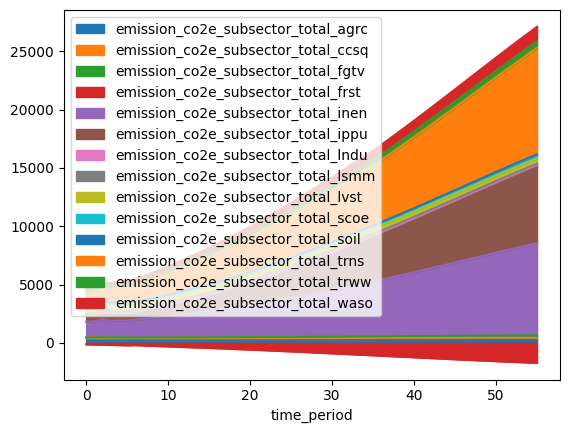

In [54]:
df_out[
    ["time_period"] + 
    [x for x in df_out.columns if x.startswith("emission_co2e_subsector")]
].plot.area(x = "time_period")

<AxesSubplot: xlabel='time_period'>

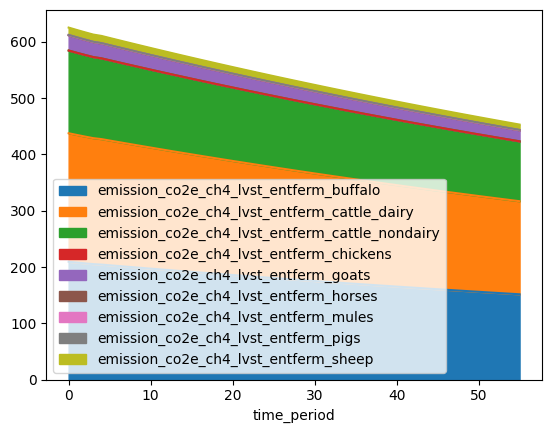

In [49]:
df_out[
    ["time_period"] + 
    [x for x in df_out.columns if x.startswith("emission_co2e_ch4_lvst")]
].plot.area(x = "time_period")

<AxesSubplot: xlabel='time_period'>

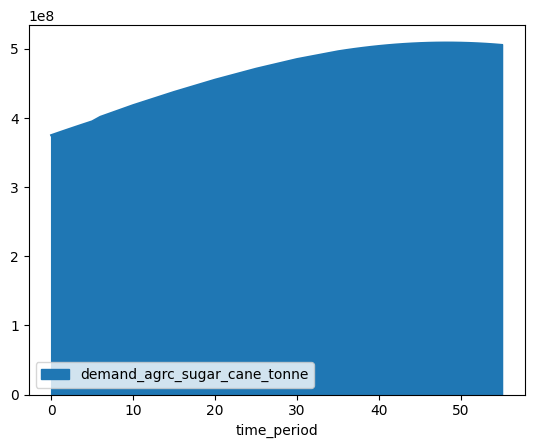

In [55]:
df_out[
    ["time_period"] + 
    [x for x in df_out.columns if ("dem" in x) and ("agrc" in x) and ("sugar" in x)]
].plot.area(x = "time_period")

<AxesSubplot: xlabel='time_period'>

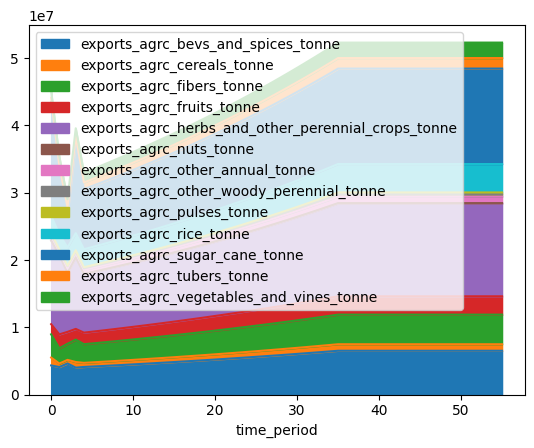

In [193]:
df_input_new[
    ["time_period"] + 
    [x for x in df_input_new.columns if ("export" in x) and ("agrc" in x)]
].plot.area(x = "time_period")


<AxesSubplot: xlabel='time_period'>

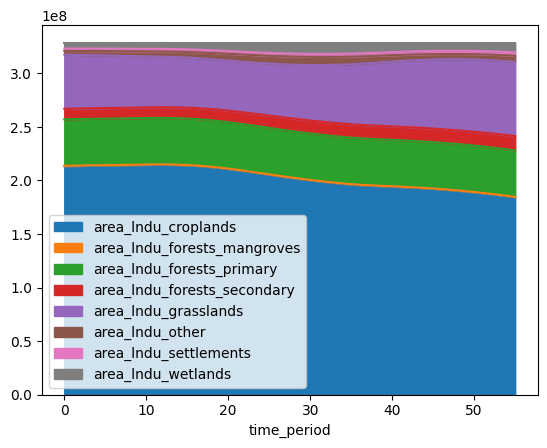

In [243]:
df_out[
    ["time_period"] + 
    [x for x in df_out.columns if ("area_lndu" in x) & ("conversion" not in x) and ("improved" not in x)]
].plot.area(x = "time_period")



In [46]:
# read in FAO data
def get_faostat_data(
    dir_faostat: str, 
    nm: str,
    encode: str = "ISO-8859-1"
) -> pd.DataFrame:
    
    fp_read = os.path.join(dir_faostat, nm, f"{nm}.csv")
    sf.check_path(fp_read)
    
    df_ret = pd.read_csv(
        fp_read, 
        encoding = encode
    )
    
    return df_ret

fp = "/Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/Data/ingestion/FAOSTAT/Inputs_LandUse_E_All_Data_(Normalized)/Inputs_LandUse_E_All_Data_(Normalized).csv"


df_lndu = get_faostat_data(
    os.path.dirname(os.path.dirname(fp)),
    "Inputs_LandUse_E_All_Data_(Normalized)"
)

df_lndu[
    df_lndu["Area"].isin(["India"])
    & df_lndu["Year"].isin([2017])
    
];

##  Note on projection method: 
 - gdp is in line 
    https://www.goldmansachs.com/intelligence/pages/how-india-could-rise-to-the-worlds-second-biggest-economy.html
- so is population 
    https://www.google.com/search?q=india+peak+population+projections&client=safari&sca_esv=591800476&source=hp&ei=WQaAZb3vJJHmkPIPmca5oA4&iflsig=AO6bgOgAAAAAZYAUab9TA-ChfCJOB9NZyBS8uSOqE5UY&oq=india+peak+population+p&gs_lp=Egdnd3Mtd2l6IhdpbmRpYSBwZWFrIHBvcHVsYXRpb24gcCoCCAAyBRAAGIAEMgsQABiABBiKBRiGAzILEAAYgAQYigUYhgMyCxAAGIAEGIoFGIYDSK8oUABYryFwAHgAkAEDmAGlAqAB_RmqAQU5LjkuNbgBA8gBAPgBAcICCxAAGIAEGLEDGIMBwgIIEAAYgAQYsQPCAhEQLhiDARjHARixAxjRAxiABMICERAuGIAEGLEDGIMBGMcBGNEDwgIIEC4YgAQYsQPCAgUQLhiABMICDhAAGIAEGIoFGLEDGIMBwgILEC4YgAQYsQMYgwHCAggQLhixAxiABMICDhAuGIAEGIoFGLEDGIMBwgIREC4YgAQYsQMYxwEY0QMY1ALCAggQLhiABBjUAsICDRAAGIAEGLEDGEYY-wHCAg4QLhiABBixAxjHARjRA8ICBhAAGBYYHg&sclient=gws-wiz


In [47]:
def project_vector(
    vec_in: pd.Series,
) -> np.ndarray:
    """
    vec_in: vector of data to project forward. Assumes that 0 growth needs
        to be overwritten
    """
    
    v = np.array(vec_in)
    rates = v[1:]/v[0:-1]
    w = np.where(rates != 1.0)[0]
    
    # get historical
    rates_historical = rates[w]
    
    # project continuously
    rates_proj = rates_historical.copy()
    n = len(rates) - len(w)
    
    for i in range(n):
        val = sf.project_from_array(
             np.array([rates_proj]).transpose(),
            max_lookback = None,
        )
        
        rates_proj = np.insert(
            rates_proj, 
            len(rates_proj), 
            val
        )
    
    # add a one and multiply cumulative growth
    rates_proj = np.insert(
        rates_proj,
        0,
        1.0
    )
    
    vec_new = v[0]*np.cumprod(rates_proj)
    
    return vec_new



modvars = [
    sisepuede.models.model_socioeconomic.modvar_gnrl_subpop,
    sisepuede.models.model_socioeconomic.modvar_econ_gdp,
]

fields = sum(
    [sisepuede.model_attributes.build_variable_fields(x) for x in modvars],
    []
)

for field in fields:
    vec = project_vector(df_input[field])
    df_input[field] = vec



In [50]:

# get data frame mapping variables to new variable trajectory groups
df_new_vargroups = pd.read_csv("/Users/jsyme/Documents/Projects/FY21/SWCHE131_1000/experiments_and_analysis/remapping_of_variable_groups_in_intensity_runs_10_12.csv")
(
    df_new_vargroups
    .rename(
        columns = dict(
            (x, x.lower().strip().replace(" ", "_"))
            for x in ["Variable Specification", "new group"]
        ),
        inplace = True,
    )
)

field_vs = "variable_specification"
field_variable = "variable"
field_new_group = "new_group"
field_tg = "variable_trajectory_group"
df_new_vargroups = (
    df_new_vargroups[[field_vs, field_new_group]]
    .rename(columns = {field_vs: field_variable})
)

# build dictionary
dict_var_to_ng = sf.build_dict(df_new_vargroups[[field_variable, field_new_group]])
dict_ng_to_tg = sorted(list(set(df_new_vargroups[field_new_group])))
dict_ng_to_tg = dict(
    (x, i + 1)
    for i, x in enumerate(dict_ng_to_tg)
)

dict_var_to_tg = {}

dfg = (
    df_new_vargroups
    .groupby([field_new_group])
)

i = 1
for ng, df in dfg:
    
    trajgroup = dict_ng_to_tg.get(ng)
    dict_var_to_tg.update(
        dict(
            (x, trajgroup) for x in list(df[field_variable])
        )
    )
    
    i += 1


# update field out
df_new_vargroups[field_tg] = df_new_vargroups[field_variable].apply(dict_var_to_tg.get)
df_new_vargroups.drop([field_new_group], axis = 1, inplace = True)

"""
df_trajgroup_assignments = sa.model_attributes.build_variable_dataframe_by_sector(
    None, 
    df_trajgroup = df_new_vargroups, 
    include_time_periods = False,
    include_simplex_group_as_trajgroup = True
)
""";




/var/folders/8m/3ll2cn6d1hdcs6gjqxr2jx5d2hffc9/T/ipykernel_3028/3245514888.py:39: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for ng, df in dfg:


In [53]:
##### importlib.reload(ma)
importlib.reload(sf)
importlib.reload(ing)
importlib.reload(tba)
importlib.reload(dta)
importlib.reload(dtc)
importlib.reload(tbe)
importlib.reload(dte)
importlib.reload(dtr)



regions_run = ["india"]
year_0_ramp = 2025
field_region = sisepuede.key_region #"nation"
regions_run = regions


# reduce inputs
df_input = df_input[
    df_input[field_region].isin(regions_run)
].reset_index(drop = True)


warnings.filterwarnings("ignore")

if True:
    # set some parameters (WILL SET TO READ FROM A CONFIG OR STRATEGY DEFINITION FILE)
    dict_config_te = {
        "categories_entc_max_investment_ramp": [
            "pp_hydropower"
            #"pp_nuclear"
        ],
        "categories_entc_renewable": [
            "pp_geothermal",
            "pp_hydropower",
            "pp_ocean",
            "pp_solar",
            "pp_wind"
        ],
        "categories_inen_high_heat": [
            "cement", 
            "chemicals", 
            "glass", 
            "lime_and_carbonite", 
            "metals"
        ],
        "dict_entc_renewable_target_msp": {
            "pp_solar": 0.15,
            "pp_geothermal": 0.1,
            "pp_wind": 0.15
        },
        "frac_inen_high_temp_elec_hydg": 0.5*0.45,
        "frac_inen_low_temp_elec": 0.95*0.45,
        "n_tp_ramp": None,
        "vir_renewable_cap_delta_frac": 0.0075,
        "vir_renewable_cap_max_frac": 0.125,
        "year_0_ramp": year_0_ramp
    }


    transformations_integrated = dtr.TransformationsIntegrated(
        dict_config_te,
        baseline_with_plur = False, # SET TO TRUE TO ALLOW THE BASELINE TO INCLUDE PLUR (NULLIFIES THE WITH PLUR STRAT)
        df_input = df_input,
        field_region = field_region,
        logger = logger,
        regions = regions_run,
    )



2024-02-10 17:45:00,083 - INFO - Successfully initialized Analysis ID 'sisepuede_run_2024-02-10T17:45:00.083761'
2024-02-10 17:45:00,086 - INFO - Verification of SISEPUEDE directory structure completed successfully with 0 errors.
2024-02-10 17:45:01,566 - INFO - NemoMod reference file checks completed successfully.
2024-02-10 17:45:01,568 - INFO - Successfully initialized SISEPUEDEFileStructure.


MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.


2024-02-10 17:45:01,572 - INFO - Initializing BaseInputDatabase


In [64]:
df_input.to_csv(
    sa.fp_csv_tmp_inputs,
    index = None,
    encoding = "UTF-8"
)

In [54]:



    
strategy_codes_keep = [
    "BASE",
    "LNDU:PLUR",
    "PFLO:BETTER_BASE",
    "PFLO:CHANGE_CONSUMPTION",
    "PFLO:SUPPLY_SIDE_TECH",
    "PFLO:ALL_NO_STOPPING_DEFORESTATION_PLUR",
    "PFLO:ALL_PLUR"
]
strategies_keep = get_strategies_from_codes(strategy_codes_keep)

if True:
    dict_transformations = transformations_integrated.build_strategies_to_templates(
        df_trajgroup = df_new_vargroups, # passed to input_template.template_from_inputs()
        include_simplex_group_as_trajgroup = True, # passed to input_template.template_from_inputs()
        return_q = False,
        strategies = strategies_keep,
        regions = regions
    )

   

2024-02-10 17:45:10,182 - INFO - Starting build of 6 strategies in 1 regions...
2024-02-10 17:45:10,184 - INFO - Starting build for region india
2024-02-10 17:45:10,193 - INFO - 	Successfully built transformation strategy_id = 1014 ('LNDU: Partial land use reallocation') in 0.01 seconds.
2024-02-10 17:45:13,509 - INFO - 	Successfully built transformation strategy_id = 5001 ('PFLO: Better baseline') in 0.15 seconds.
2024-02-10 17:45:16,782 - INFO - 	Successfully built transformation strategy_id = 5004 ('PFLO: Change consumer behavior') in 0.15 seconds.
2024-02-10 17:45:20,728 - INFO - 	Successfully built transformation strategy_id = 5006 ('PFLO: Supply side technologies and transformations') in 0.77 seconds.
2024-02-10 17:45:24,966 - INFO - 	Successfully built transformation strategy_id = 5007 ('PFLO: All transformations without stopping deforestation and partial land use reallocation') in 1.11 seconds.
2024-02-10 17:45:29,010 - INFO - 	Successfully built transformation strategy_id = 50

In [55]:
sisepuede = ssp.SISEPUEDE(
    "calibrated",
    initialize_as_dummy = False,
    regions = ["india"],
    try_exogenous_xl_types_in_variable_specification = True,
)

2024-02-10 17:45:36,912 - INFO - Successfully initialized SISEPUEDEFileStructure.
2024-02-10 17:45:36,912 - INFO - Successfully initialized SISEPUEDEFileStructure.
2024-02-10 17:45:36,915 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2024-02-10 17:45:36,915 - WARNING - Missing key dict_dimensional_keys: key time_series not found. Tables that rely on the time_series will not have index checking.
2024-02-10 17:45:36,916 - INFO - 	Setting export engine to 'sqlite'.
2024-02-10 17:45:36,916 - INFO - 	Setting export engine to 'sqlite'.
2024-02-10 17:45:36,921 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2024-02-10 17:45:36,921 - WARNING - No index fields defined. Index field values will not be checked when writing to tables.
2024-02-10 17:45:36,922 - INFO - Successfully instantiated table ANALYSIS_METADATA
2024-02-10 17:45:36,922 - INFO - Succes

MISSIONSEARCHNOTE: As of 2023-10-06, there is a temporary solution implemeted in ModelAttributes.get_variable_to_simplex_group_dictionary() to ensure that transition probability rows are enforced on a simplex.

FIX THIS ASAP TO DERIVE PROPERLY.


2024-02-10 17:45:39,229 - INFO - Initializing FutureTrajectories
2024-02-10 17:45:39,229 - INFO - Initializing FutureTrajectories
2024-02-10 17:45:46,505 - INFO - Instantiating 1388 sampling units.
2024-02-10 17:45:46,505 - INFO - Instantiating 1388 sampling units.
2024-02-10 17:45:46,578 - INFO - Iteration 0 complete.
2024-02-10 17:45:46,578 - INFO - Iteration 0 complete.
2024-02-10 17:45:59,489 - INFO - Iteration 250 complete.
2024-02-10 17:45:59,489 - INFO - Iteration 250 complete.
2024-02-10 17:46:06,128 - INFO - Iteration 500 complete.
2024-02-10 17:46:06,128 - INFO - Iteration 500 complete.
2024-02-10 17:46:12,745 - INFO - Iteration 750 complete.
2024-02-10 17:46:12,745 - INFO - Iteration 750 complete.
2024-02-10 17:46:19,353 - INFO - Iteration 1000 complete.
2024-02-10 17:46:19,353 - INFO - Iteration 1000 complete.
2024-02-10 17:46:26,218 - INFO - Iteration 1250 complete.
2024-02-10 17:46:26,218 - INFO - Iteration 1250 complete.
2024-02-10 17:46:30,345 - INFO - 	1388 sampling un

[0, 1014, 5001, 5004, 5006, 5007, 5009]

In [56]:
dict_filt = {
    "future_id": [0],
    "design_id": [0], 
    "strategy_id": [1014, 5007, 5009]#strategies_keep#[0, 1014, 5001, 5004, 5006, 5007, 5009]
}


dict_primary_keys_out = sisepuede(
    dict_filt,
    chunk_size = 2,
    include_electricity_in_energy = True,
    reinitialize_output_table_on_verification_failure = True,
    #regions = ["mexico"],
    thresholds = (10**(-5), 10**4.5),
)


2024-02-10 17:48:10,144 - INFO - 
***	STARTING REGION india	***

2024-02-10 17:48:10,144 - INFO - 
***	STARTING REGION india	***

2024-02-10 17:48:17,535 - INFO - Trying run primary_id = 14014 in region india
2024-02-10 17:48:17,535 - INFO - Trying run primary_id = 14014 in region india
2024-02-10 17:48:17,537 - INFO - Running AFOLU model
2024-02-10 17:48:17,537 - INFO - Running AFOLU model
2024-02-10 17:48:17,936 - INFO - AFOLU model run successfully completed
2024-02-10 17:48:17,936 - INFO - AFOLU model run successfully completed
2024-02-10 17:48:17,937 - INFO - Running CircularEconomy model
2024-02-10 17:48:17,937 - INFO - Running CircularEconomy model
2024-02-10 17:48:18,039 - INFO - CircularEconomy model run successfully completed
2024-02-10 17:48:18,039 - INFO - CircularEconomy model run successfully completed
2024-02-10 17:48:18,040 - INFO - Running IPPU model
2024-02-10 17:48:18,040 - INFO - Running IPPU model
2024-02-10 17:48:18,218 - INFO - IPPU model run successfully complet

2024-10-Feb 17:48:19.277 Opened SQLite database at /Users/jsyme/Documents/Projects/git_jbus/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2024-10-Feb 17:48:19.609 Added NEMO structure to SQLite database at /Users/jsyme/Documents/Projects/git_jbus/sisepuede/tmp/nemomod_intermediate_database.sqlite.
2024-10-Feb 17:48:45.590 Started modeling scenario.
2024-10-Feb 17:55:23.052 Finished modeling scenario.


┌ Warning: Model period activity upper limits for technologies (TotalTechnologyModelPeriodActivityUpperLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:464
┌ Warning: Model period emission limits (ModelPeriodEmissionLimit parameter) are not enforced when modeling selected years.
└ @ NemoMod ~/.julia/packages/NemoMod/d2ky8/src/scenario_calculation.jl:6181
2024-02-10 17:55:23,491 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2024-02-10 17:55:23,491 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2024-02-10 17:55:23,529 - INFO - ElectricEnergy model run successfully completed
2024-02-10 17:55:23,529 - INFO - ElectricEnergy model run successfully completed
2024-02-10 17:55:23,531 - INFO - Running Energy (Fugitive Emissions)
2024-02-10 17:55:23,531 - INFO - Running Energy (Fugitive Emissions)
2024-02-10 17:55:23,629 - INFO - Fugit

2024-10-Feb 17:55:26.982 Started modeling scenario.
2024-10-Feb 18:06:20.808 Finished modeling scenario.


2024-02-10 18:06:21,171 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2024-02-10 18:06:21,171 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2024-02-10 18:06:21,198 - INFO - ElectricEnergy model run successfully completed
2024-02-10 18:06:21,198 - INFO - ElectricEnergy model run successfully completed
2024-02-10 18:06:21,199 - INFO - Running Energy (Fugitive Emissions)
2024-02-10 18:06:21,199 - INFO - Running Energy (Fugitive Emissions)
2024-02-10 18:06:21,290 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-02-10 18:06:21,290 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-02-10 18:06:21,291 - INFO - Appending Socioeconomic outputs
2024-02-10 18:06:21,291 - INFO - Appending Socioeconomic outputs
2024-02-10 18:06:21,308 - INFO - Socioeconomic outputs successfully appended.
2024-02-10 18:06:21,308 - INFO - Socioeconomic outputs successfully appended.
20

2024-10-Feb 18:06:25.424 Started modeling scenario.
2024-10-Feb 18:17:49.080 Finished modeling scenario.


2024-02-10 18:17:49,450 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2024-02-10 18:17:49,450 - INFO - NemoMod ran successfully with the following status: <PyCall.jlwrap OPTIMAL>
2024-02-10 18:17:49,477 - INFO - ElectricEnergy model run successfully completed
2024-02-10 18:17:49,477 - INFO - ElectricEnergy model run successfully completed
2024-02-10 18:17:49,478 - INFO - Running Energy (Fugitive Emissions)
2024-02-10 18:17:49,478 - INFO - Running Energy (Fugitive Emissions)
2024-02-10 18:17:49,566 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-02-10 18:17:49,566 - INFO - Fugitive Emissions from Energy model run successfully completed
2024-02-10 18:17:49,567 - INFO - Appending Socioeconomic outputs
2024-02-10 18:17:49,567 - INFO - Appending Socioeconomic outputs
2024-02-10 18:17:49,584 - INFO - Socioeconomic outputs successfully appended.
2024-02-10 18:17:49,584 - INFO - Socioeconomic outputs successfully appended.
20

In [57]:
df_out = sisepuede.read_output(None)


In [58]:
def plot_stack(
    df: pd.DataFrame,
    fields: pd.DataFrame, 
    field_x: Union[str, None] = None,
) -> Union['matplotlib.Plot', None]:
    """
    plt.plot.area() cannot handle negative trajctories.
    
    Function Arguments
    ------------------
    - df: data frame to pull data from
    - fields: fields to plot

    Keyword Arguments
    ----------------- 
    - x: optional field `x` in data frame to use for x axis
    """
    
    # check fields
    fields = [x for x in df.columns if x in fields]
    if len(fields) == 0:
        return None
    
    field_x = field_x if field_x in df.columns else None
    fields = (
        [x for x in fields if x != field_x] + [field_x]
        if field_x is not None
        else fields
    )
    
    
    df_plot = df[felds].copy()
    
    # 
    for k in fields:
        if x == field_x:
            continue
        
        
        vec = np.array(df_plot[k])
        bnds = (0, np.inf) if (vec[-1] >= 0) else (-np.inf, 0)
        if (max(vec) > 0) and (min(vec) < 0):
            k0 = f"{k}_positive"
            k1 = f"{k}_negative"
            
            df_out[k0] = sf.vec_bounds(np.array(df_out[k]), (0, np.inf))
            df_out[k1] = sf.vec_bounds(np.array(df_out[k]), (-np.inf, 0))
            df_out.drop([k], axis = 1, inplace = True)
            flds = flds + [k0, k1]
            flds = [x for x in flds if x != k]
            
        else:
            df_out[k] = sf.vec_bounds(np.array(df_out[k]), bnds)
    
    
    
    

<AxesSubplot: xlabel='time_period'>

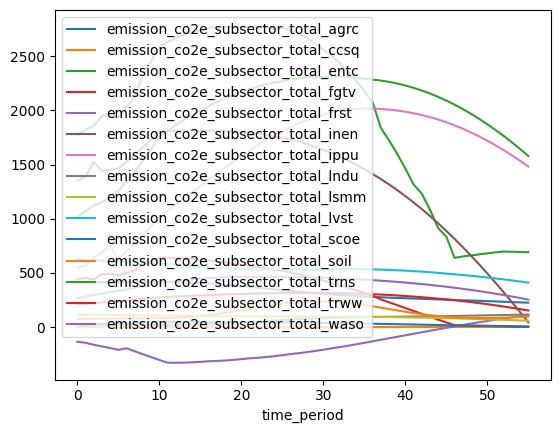

In [59]:
flds = [
    x for x in df_out.columns 
    if True
        & ("area_lndu" in x) 
        & ("conversion" not in x)
        & ("improved" not in x)
]

flds = [
    x for x in df_out.columns if x.startswith("emission_co2e_subsector")
]

df_out[
    df_out["primary_id"].isin([125125])
][
    ["time_period"] + flds
].plot(x = "time_period")



In [60]:
df_out["primary_id"].unique()

array([ 14014, 125125, 127127])

In [263]:
"totalvalue_enfu_fuel_consumed_entc_fuel_other" in df_out.columns

True

In [61]:
sisepuede.odpt_primary.get_indexing_dataframe(
    key_values = list(df_out[sisepuede.key_primary].unique())
)


,primary_id,design_id,strategy_id,future_id
0,14014,0,1014,0
1,125125,0,5007,0
2,127127,0,5009,0


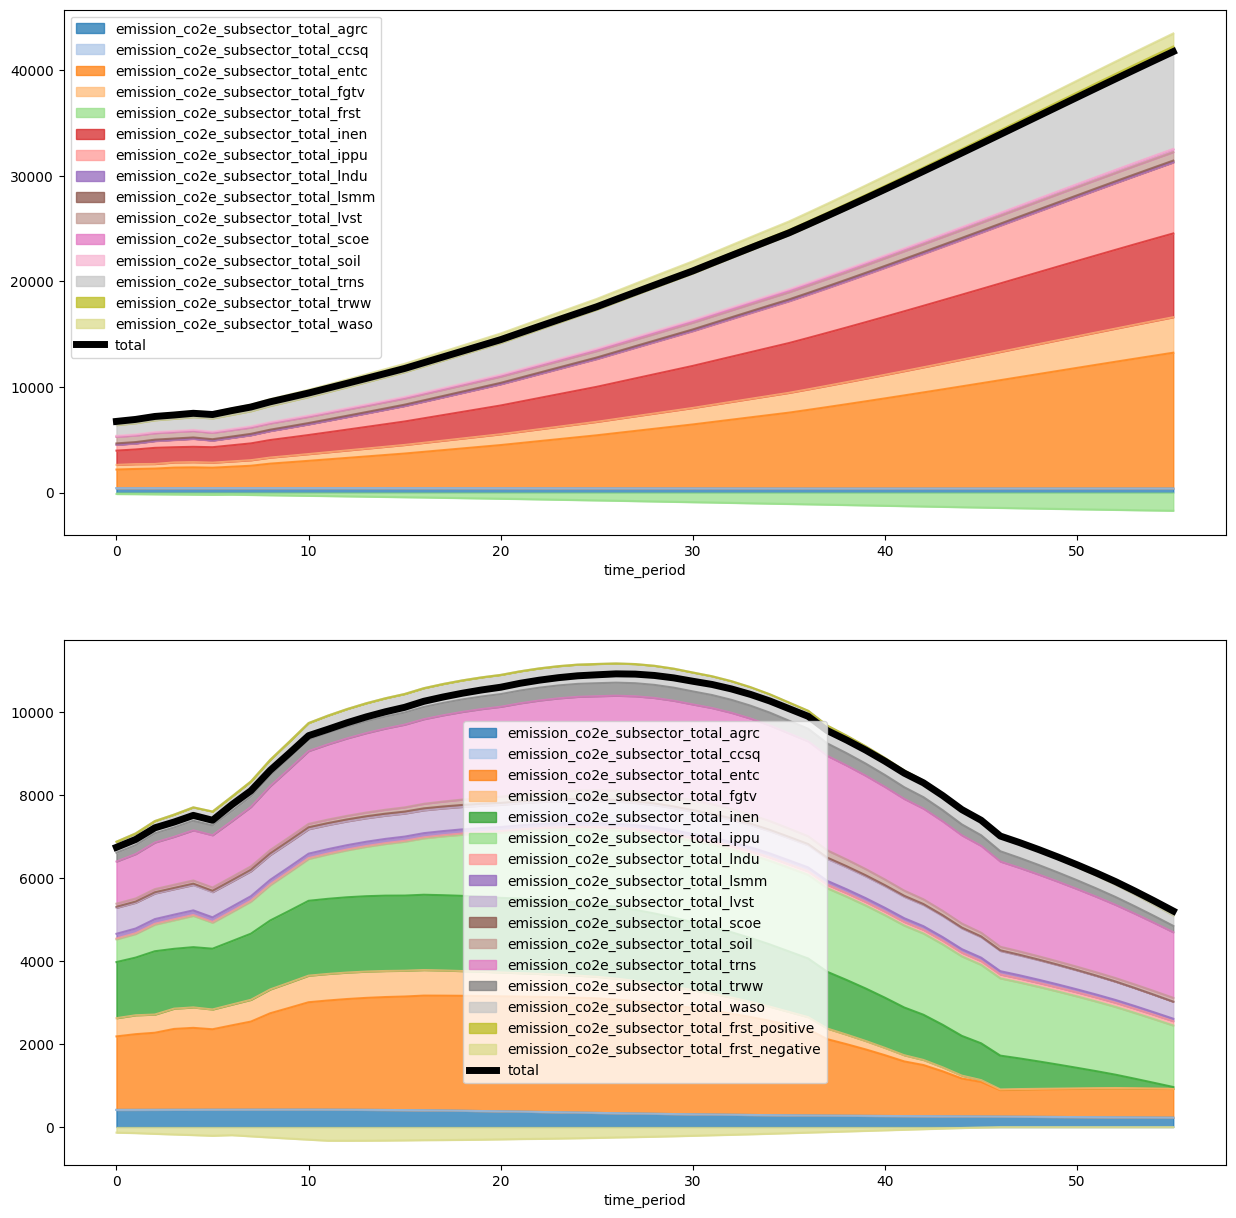

In [62]:

# 3008, 3009, 303
strat_id, strat_id_intervention = 1014, 5009# 0, 5009
future_id, future_id_intervention = 0, 0#875
design_id = 0

# set dictionaries
dict_filt = {
    sisepuede.key_design: design_id,
    sisepuede.key_future: future_id,
    sisepuede.key_strategy: strat_id,
}
dict_filt_intervention = {
    sisepuede.key_design: design_id,
    sisepuede.key_future: future_id_intervention,
    sisepuede.key_strategy: strat_id_intervention,
}
# update if any are missing
for k, val in dict_filt.items():
    if k not in dict_filt.keys():
        dict_filt.update({k: val[0]})
    if k not in dict_filt_intervention.keys():
        dict_filt_intervention.update({k: val[0]})
        


primary_id = sisepuede.odpt_primary.get_key_value(**dict_filt)
df_filt = df_out[
    df_out[sisepuede.key_primary].isin([primary_id])
]
df_in_filt = sisepuede.generate_scenario_database_from_primary_key(primary_id)

        
        
primary_id_intervention = sisepuede.odpt_primary.get_key_value(**dict_filt_intervention)
df_filt_intervention = df_out[
    df_out[sisepuede.key_primary].isin([primary_id_intervention])
]
df_in_filt_intervention = sisepuede.generate_scenario_database_from_primary_key(primary_id_intervention)




############################
###                      ###
###    BEGIN PLOTTING    ###
###                      ###
############################

fig, ax = plt.subplots(2, 1, figsize = (15, 15))
#ax[0].set_ylim(-150, 350)
#ax[0].set_ylim(0, 900)
#ax[1].set_ylim(0, 900)

palette_func = plt.cm.tab20#plt.cm.hsv

flds = [sisepuede.key_time_period]
if False:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("emission_co2e_subsector_total") 
        and (
            False
            or ("ccsq" in x) 
            or ("entc" in x)
            or ("enfu" in x)
            or ("fgtv" in x)
            or ("inen" in x)
            or ("scoe" in x)
            or ("trns" in x)
        )
    ]
    
if False:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("emission_co2e_subsector_total") 
        and (
            #True
            ("agrc" in x)
            or ("frst" in x)
            or ("lndu" in x)
            or ("lsmm" in x)
            or ("lvst" in x)
            or ("soil" in x)
            #("entc" in x) 
            #or ("scoe" in x)
            #or ("lsmm" in x)
            #or ("soil" in x)
            #or ("frst" in x)
            #or ("lndu" in x)
        )
    ]
    
if False:
    flds = [x for x in flds if "trns" in x]
    
if True:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("emission_co2e_") 
        and (
            True
            #and ("lvst" in x)
            #or ("fgtv" in x)
            #and ("subsector_total" not in x)
            and ("subsector_total" in x)
            and 
            (
                True
                #("lvst" in x)
                #or ("lsmm" in x)
                #or ("soil" in x)
            )
        )
    ]

if False:
    flds += [
        x for x in df_filt.columns 
        if x.startswith("energy_demand_enfu_") 
        and (
            True
            #("entc" in x)
            #or ("fgtv" in x)
            #("inen" in x)
            & ("subsector" in x)
            & ("electricity" in x)
        )
    ]

if False:
    #flds = [x for x in df_filt.columns if x.startswith("energy_demand_enfu") and ("total" in x) and ("subsector" not in x)]# and (("natural_gas" in x) or ("crude" in x) or ("electricity" in x) or ("hydrogen" in x))]
    cat = "rail_passenger"
    pre = "energy_consumption_trns"
    fld_ignore = f"{pre}_{cat}"
    flds = [sisepuede.key_time_period] + [x for x in df_filt.columns if x.startswith(pre) and (cat in x) and (x != fld_ignore)]
    #flds = [x for x in df_filt.columns if x.startswith("passenger_distance")]

add_total = True
plot_from_modvar = False

if True:

    # AFOLU
    modvar_plot = sisepuede.models.model_afolu.modvar_lndu_area_by_cat
    #modvar_plot = sisepuede.models.model_afolu.modvar_lndu_area_converted_from_type
    #modvar_plot = sisepuede.models.model_afolu.modvar_lndu_area_by_cat
    #modvar_plot = sisepuede.models.model_afolu.modvar_soil_emissions_co2_urea
    #modvar_plot = sisepuede.models.model_afolu.modvar_lvst_pop
    #modvar_plot = sisepuede.models.model_afolu.modvar_lvst_adjusted_equivalent_exports

    #modvar_plot = sisepuede.models.model_afolu.modvar_frst_emissions_co2_sequestration
    #modvar_plot = sisepuede.models.model_afolu.modvar_lndu_emissions_conv
    #modvar_plot = sisepuede.models.model_afolu.modvar_lvst_emissions_ch4_ef
    #modvar_plot = sisepuede.models.model_afolu.modvar_lsmm_emissions_ch4
    
    
    # ENERGY
    #modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_emissions_co2_mne
    #modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_energy_consumption_total
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_passenger_distance_traveled
    #modvar_plot = sisepuede.models.model_energy.modvar_trde_demand_pkm
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_mass_distance_traveled
    #modvar_plot = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
    #modvar_plot = sisepuede.models.model_energy.modvar_enfu_exports_fuel_adjusted
    #modvar_plot = sisepuede.models.model_energy.modvar_enfu_energy_demand_by_fuel_total
    #modvar_plot = sisepuede.models.model_energy.modvar_enfu_energy_demand_by_fuel_trns
    #modvar_plot = sisepuede.models.model_electricity.modvar_entc_nemomod_production_by_technology
    #modvar_plot = sisepuede.models.model_energy.modvar_fgtv_emissions_ch4
    #modvar_plot = sisepuede.models.model_energy.modvar_trns_vehicle_distance_traveled_electricity
    
    #IPPU
    #modvar_plot = sisepuede.models.model_ippu.modvar_ippu_qty_total_production
    
    
    
    # NO INTERVENTION
    
    df = sisepuede.model_attributes.extract_model_variable(
        df_filt,
        modvar_plot
    )
    df = pd.concat([df_filt[[sisepuede.key_time_period]].reset_index(drop = True), df], axis = 1)
    df = df[[x for x in df.columns if ("nuclear" not in x) and ("crude" not in x)]]
    df = df_filt[flds] if (not plot_from_modvar) else df
    if len(df) > 0:
        for k in df.columns:
            vec = np.array(df[k])
            bnds = (0, np.inf) if (vec[-1] >= 0) else (-np.inf, 0)
            if (max(vec) > 0) and (min(vec) < 0):
                k0 = f"{k}_positive"
                k1 = f"{k}_negative"
                df[k0] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
                df[k1] = sf.vec_bounds(np.array(df[k]), (-np.inf, 0))
                df.drop([k], axis = 1, inplace = True)
            else:
                df[k] = sf.vec_bounds(np.array(df[k]), bnds)
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    alpha = 1 if not add_total else 0.75
    df.plot.area(x = sisepuede.key_time_period, ax = ax[0], color = colors, alpha = alpha)
    if add_total:
        df["total"] = df.drop([sisepuede.key_time_period], axis = 1).sum(axis = 1)
        df[[sisepuede.key_time_period, "total"]].plot(x = sisepuede.key_time_period, ax = ax[0], color = "black", linewidth = 5)
    df_plot_noint = df.copy()
        
        
    # INTERVENTION
    
    df = sisepuede.model_attributes.extract_model_variable(
        df_filt_intervention,
        modvar_plot
    )
    df = pd.concat([df_filt_intervention[[sisepuede.key_time_period]].reset_index(drop = True), df], axis = 1)
    df = df[[x for x in df.columns if ("nuclear" not in x) and ("crude" not in x)]]
    df = df_filt_intervention[flds] if (not plot_from_modvar) else df
    
    if False:
        # UNCOMMENT TO USE DIFF
        vec = np.array(df[sisepuede.key_time_period])
        flds = [x for x in df.columns if (x != sisepuede.key_time_period)]
        df = pd.DataFrame(np.array(df_filt_intervention[flds]) - np.array(df_filt[flds]), columns = flds)
        df[sisepuede.key_time_period] = vec

    
    
    for k in df.columns:
        vec = np.array(df[k])
        bnds = (0, np.inf) if (vec[-1] >= 0) else (-np.inf, 0)
        if (max(vec) > 0) and (min(vec) < 0):
            k0 = f"{k}_positive"
            k1 = f"{k}_negative"
            df[k0] = sf.vec_bounds(np.array(df[k]), (0, np.inf))
            df[k1] = sf.vec_bounds(np.array(df[k]), (-np.inf, 0))
            df.drop([k], axis = 1, inplace = True)
        else:
            df[k] = sf.vec_bounds(np.array(df[k]), bnds)
    
    m, n = df.shape
    colors = [palette_func(x/n) for x in range(n)]
    
    alpha = 1 if not add_total else 0.75
    df.plot.area(x = sisepuede.key_time_period, ax = ax[1], color = colors, alpha = alpha)
    if add_total:
        df["total"] = df.drop([sisepuede.key_time_period], axis = 1).sum(axis = 1)
        df[[sisepuede.key_time_period, "total"]].plot(x = sisepuede.key_time_period, ax = ax[1], color = "black", linewidth = 5)
    df_plot_int = df.copy()
    #df.plot(ax = ax[1], color = colors)



##  Export Output

In [64]:
all_primaries = sorted(list(df_out[sisepuede.key_primary].unique()))
region = "india" 
df_in = []

for primary in all_primaries: 
    df_in_filt = sisepuede.generate_scenario_database_from_primary_key(primary)
    df_in.append(df_in_filt.get(region))

df_in = pd.concat(df_in, axis = 0).reset_index(drop = True)


df_export = pd.merge(
    df_out,
    df_in,
    how = "left",
)

###### 

In [ ]:
#127127

<AxesSubplot: >

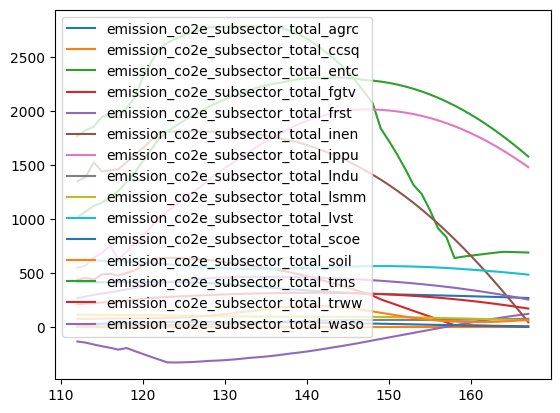

In [79]:
df_export[
    df_export["primary_id"].isin([127127])
][[x for x in df_export.columns if x.startswith("emission_co2e_subsec")]].plot()

In [65]:

# check output directory 
dir_pkg = os.path.join(sisepuede.file_struct.dir_out, f"sisepuede_summary_results_run_{sisepuede.id_fs_safe}")
os.makedirs(dir_pkg) if not os.path.exists(dir_pkg) else None

for tab in ["ATTRIBUTE_STRATEGY"]:
    sisepuede.database.db.read_table(tab).to_csv(
        os.path.join(dir_pkg, f"{tab}.csv"),
        index = None,
        encoding = "UTF-8"
    )


df_primary = sisepuede.odpt_primary.get_indexing_dataframe(sorted(list(df_out[sisepuede.key_primary].unique())))
df_primary.to_csv(
    os.path.join(dir_pkg, f"ATTRIBUTE_PRIMARY.csv"),
    index = None,
    encoding = "UTF-8"
)

df_export.to_csv(
    os.path.join(dir_pkg, f"sisepuede_results_{sisepuede.id_fs_safe}_WIDE_INPUTS_OUTPUTS.csv"),
    index = None,
    encoding = "UTF-8"
)

In [81]:

fields_show

['gasrecovered_lsmm_biogass_anaerobic_digester_tonne',
 'gasrecovered_trww_biogas_tonne',
 'gasrecovered_waso_biogas_anaerobic_tonne',
 'gasrecovered_waso_biogas_landfills_tonne']

In [82]:

fields_show = ["emission_co2e_ch4_trww_treated_septic_treatment"]
fields_show = [x for x in df_out.columns if ("aerobic" in x) & ("trww" in x) & ("ch4" in x)]
fields_show = [x for x in df_out.columns if ("biogas" in x) & ("gasrecovered" in x)]

df_out[
    df_out[sisepuede.key_time_period].isin([30, 55])
    # df_out[sisepuede.key_primary].isin([14014])
][
    [
        sisepuede.key_primary,
        sisepuede.key_time_period
    ] + fields_show
]

,primary_id,time_period,gasrecovered_lsmm_biogass_anaerobic_digester_tonne,gasrecovered_trww_biogas_tonne,gasrecovered_waso_biogas_anaerobic_tonne,gasrecovered_waso_biogas_landfills_tonne
30,14014,30,2.254492e+05,0.000000e+00,6.091981e+05,0.000000e+00
55,14014,55,2.793731e+05,0.000000e+00,6.813399e+05,0.000000e+00
86,125125,30,1.366658e+07,4.237610e+07,4.126837e+06,7.819183e+07
111,125125,55,4.921871e+07,3.079372e+08,7.734657e+06,4.085389e+08
142,127127,30,1.366475e+07,4.237610e+07,4.126837e+06,7.819183e+07
167,127127,55,4.921380e+07,3.079372e+08,7.734657e+06,4.085389e+08


In [95]:
(
    pd.DataFrame(
        df_out[[x for x in df_out.columns if ("emission_co2e_ch4" in x)]].iloc[55]
    )
    .sort_values(by = [55], ascending = False)
    .iloc[0:25]
)


,55
emission_co2e_ch4_fgtv_fuel_coal,3011.662475
emission_co2e_ch4_waso_open_dump_chemical_industrial,543.264980
emission_co2e_ch4_trww_untreated_no_sewerage_treatment,293.537161
emission_co2e_ch4_lvst_entferm_cattle_dairy,290.279579
emission_co2e_ch4_waso_open_dump_food,268.112914
emission_co2e_ch4_lvst_entferm_buffalo,266.042279
emission_co2e_ch4_lvst_entferm_cattle_nondairy,195.673535
emission_co2e_ch4_fgtv_fuel_natural_gas,155.153632
emission_co2e_ch4_agrc_anaerobicdom_rice,90.185943
emission_co2e_ch4_trww_treated_secondary_anaerobic_treatment,56.654791


In [78]:

fields_show = ["emission_co2e_ch4_trww_treated_septic_treatment"]
fields_show = [x for x in df_out.columns if ("aerobic" in x) & ("trww" in x) & ("ch4" in x)]

df_out[
    df_out[sisepuede.key_time_period].isin([30, 55])
    # df_out[sisepuede.key_primary].isin([14014])
][
    [
        sisepuede.key_primary,
        sisepuede.key_time_period
    ] + fields_show
]

,primary_id,time_period,emission_co2e_ch4_trww_treated_advanced_aerobic_treatment,emission_co2e_ch4_trww_treated_advanced_anaerobic_treatment,emission_co2e_ch4_trww_treated_secondary_aerobic_treatment,emission_co2e_ch4_trww_treated_secondary_anaerobic_treatment
30,14014,30,0.000553,0.110616,0.252205,33.627295
55,14014,55,0.000932,0.186364,0.424911,56.654791
86,125125,30,0.089262,37.714248,0.191767,25.568878
111,125125,55,0.051700,25.330606,0.065754,8.767185
142,127127,30,0.089262,37.714248,0.191767,25.568878
167,127127,55,0.051700,25.330606,0.065754,8.767185


In [73]:
df_out[
    df_out[sisepuede.key_time_period].isin([30, 55])
    # df_out[sisepuede.key_primary].isin([14014])
][
    [
        sisepuede.key_primary,
        sisepuede.key_time_period,
        "emission_co2e_subsector_total_waso"
    ]
]

,primary_id,time_period,emission_co2e_subsector_total_waso
30,14014,30,719.136109
55,14014,55,1241.724910
86,125125,30,454.798159
111,125125,55,253.280416
142,127127,30,454.798159
167,127127,55,253.280416
